In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

# Problem 7

In [3]:
def data_generator( seed , n , dim=9 ) :
    mu1 = [1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 ]
    mu2 = [0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 ]
    mu3 = [0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 ]

    sigma1 = np.diag ( [ 1, 1, 1, 0.1 , 0.1, 0.1, 0.1, 0.1, 0.1] )
    sigma2 = np.diag ( [ 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 1 , 1 , 1 ] )
    sigma3 = np.diag ( [ 0.1 , 0.1 , 0.1 , 1 , 1 , 1 , 0.1 , 0.1 , 0.1 ] )

    np.random.seed ( seed )

    rand_int = np.random.choice( [1,2,3], size = n )

    unique_values, counts = np.unique( rand_int , return_counts = True )

    datapoints = np.zeros (( 0 , dim ) )
    labels = np.array ( [] )

    for i, (uv,mu,sigma) in enumerate ( zip(unique_values,
                                                 [ mu1, mu2, mu3 ],
                                                 [sigma1, sigma2, sigma3 ]
                                        ) ):
        
        datapoints = np.vstack(( datapoints,
                                 np.random.multivariate_normal ( mu, sigma, size = counts [i] ) ) )
        labels = np.hstack(( labels, uv * np.ones ( counts [i] ) ) )
        
    shuff = np.random.permutation ( len(labels) )

    return datapoints[shuff] , labels[shuff]

In [10]:
def kmean_and_rand(datapoints, truelabels):

    kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(datapoints)

    learned_labels = kmeans.labels_

    rand_index = adjusted_rand_score(truelabels, learned_labels)
    return rand_index

## Problem 7 (a)

In [31]:
results = []
n_seeds = 100
for n in [100,200,300,400,500]:
    rand_sum = 0
    for seed in range(n_seeds):
        datapoints, truelabels = data_generator(seed, n)
        randindex = kmean_and_rand(datapoints, truelabels)
        rand_sum += randindex

    results.append({
        "n": n,
        "avg_rand_idx": rand_sum/n_seeds
    })
    
result7a = pd.DataFrame(results)
result7a

,n,avg_rand_idx
0,100,0.731294
1,200,0.768839
2,300,0.786337
3,400,0.779896
4,500,0.788315


<Axes: title={'center': 'Avg Rand Index from Original Data'}, xlabel='n'>

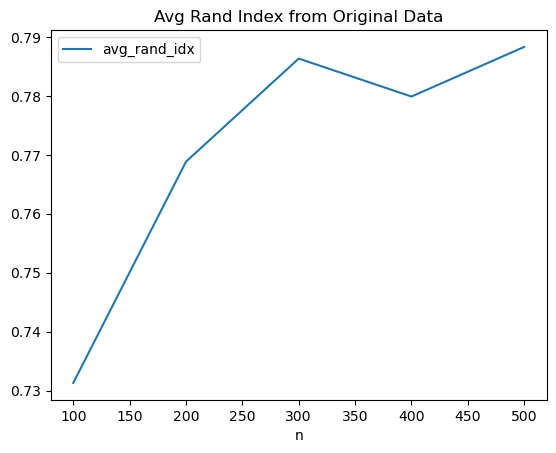

In [43]:
result7a.set_index('n').plot(title='Avg Rand Index from Original Data')

We see that there is an positive trend in the average Rand Index when the number of datapoints ($n$) increases.

## Problem 7 (b)

In [29]:
results = []
n_seeds = 100
for n in [100,200,300,400,500]:
    rand_sum = 0
    for seed in range(n_seeds):
        datapoints, truelabels = data_generator(seed, n)
        pca = PCA(n_components=3)
        pca.fit(datapoints)
        reduced_datapoints = pca.transform(datapoints)

        randindex = kmean_and_rand(reduced_datapoints, truelabels)
        rand_sum += randindex

    results.append({
        "n": n,
        "avg_rand_idx": rand_sum/n_seeds
    })
    
result7b = pd.DataFrame(results)
result7b

,n,avg_rand_idx
0,100,0.757637
1,200,0.784378
2,300,0.797535
3,400,0.791619
4,500,0.797233


<Axes: title={'center': 'Avg Rand Index from PCA Data'}, xlabel='n'>

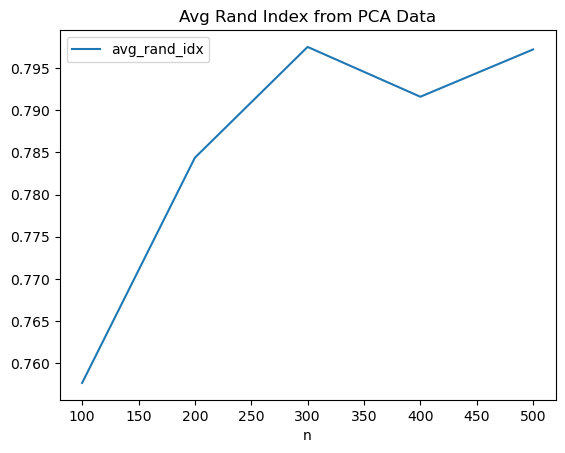

In [44]:
result7b.set_index('n').plot(title='Avg Rand Index from PCA Data')

Again, we see that there is an positive trend in the average Rand Index when the number of datapoints ($n$) increases.

## Problem 7 (c)

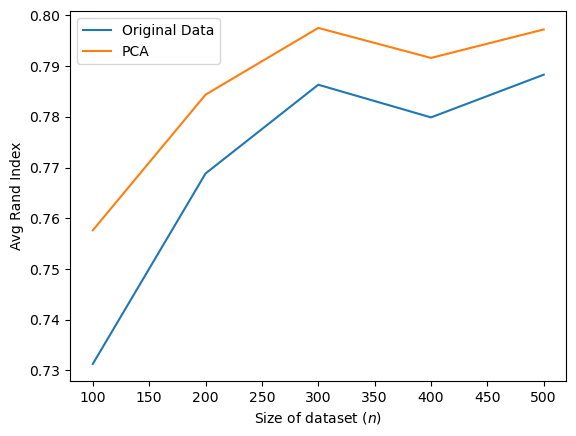

In [37]:
# Create the Plot
plt.plot(result7a['n'], result7a['avg_rand_idx'], label='Original Data')  # Plot first series
plt.plot(result7b['n'], result7b['avg_rand_idx'], label='PCA')  # Plot second series

# Add Labels, Title, and Legend
plt.xlabel('Size of dataset ($n$)')
plt.ylabel('Avg Rand Index')
# plt.title('Plot with Two X-Series')
plt.legend()  # Display the legend

# Display the Plot
plt.show()

Regardless of whether the data is transformed, there is an positive trend in the average Rand Index when the number of datapoints ($n$) increases. Moreover, the Rand Indices are consistently higher when clustering with PCA data, so clustering with data after PCA seems a better choice.

In [40]:
result7a['avg_rand_idx'].std(), result7b['avg_rand_idx'].std()

(0.023427400860044335, 0.0165632102243695)

Lastly, we see that the standard deviations in Rand Indices are $0.023$ and $0.016$ for the results from original data and PCA, respectively. In other words, the clustering performance is more stable with PCA data.

# Problem 8

In [87]:
from sklearn.cluster import MeanShift, KMeans, SpectralClustering
from scipy.spatial.distance import pdist
import random
import math

random.seed( 0 )

In [49]:
## Data set 1
X1 = []
for i in range(1000) :
    theta = random.uniform (0, 2 * math.pi )
    # choice 
    radius = random.gauss (0, 0.2) + random.choice( [1, 3] )
    X1.append( [ radius * math.cos(theta), radius * math.sin(theta) ] )
X1 = np.array(X1)

## Data Set 2
X2 = []
for i in range(1000) :
    theta = random.uniform (0, 2 * math.pi)
    radius = random.gauss (0, 0.1) + 2
    if theta < math . pi :
        X2.append ( [ radius * math.cos(theta) - 1 , radius * math.sin(theta) ] )
    else :
        X2.append ( [ radius * math.cos(theta) + 1 , radius * math.sin(theta) ] )
X2 = np.array(X2)

## Data Set 3
X3 = []
for i in range(1000) :
    radius = random.gauss (0, 1)
    theta = random.uniform (0, 2 * math.pi)
    center = random.choice ( [ [0, 1], [3, 3],  [1, - 3] ] )
    X3.append( [ radius * math.cos(theta) + center[0] , radius * math.sin(theta) + center[1] ] )
X3 = np.array(X3)

In [141]:
def plot_clusters(X, labels, feature_names=('Feature 1', 'Feature 2'), title='K-Means Clustering'):
    # Create a dataframe for plotting
    df = pd.DataFrame({
        feature_names[0]: X[:, 0],
        feature_names[1]: X[:, 1],
        'learned_labels': labels
    })

    scatter = plt.scatter(df[feature_names[0]], df[feature_names[1]], c=df['learned_labels'], s=3)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)

    legend1 = plt.legend(*scatter.legend_elements(),
                         loc="lower right", title="Categories")
    plt.gca().add_artist(legend1)

    plt.show()

## Problem 8 (a)

In [142]:
def kmeans_cluster(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)

    labels = kmeans.labels_

    return labels

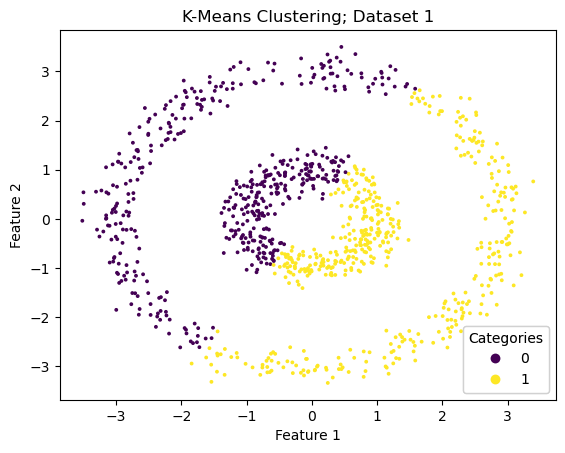

In [155]:
labels = kmeans_cluster(X1, n_clusters=2)
plot_clusters(X1, labels, title='K-Means Clustering; Dataset 1')

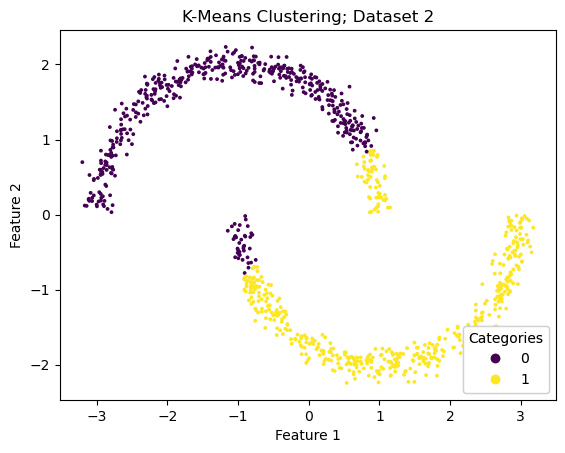

In [156]:
labels = kmeans_cluster(X2, n_clusters=2)
plot_clusters(X2, labels, title='K-Means Clustering; Dataset 2')

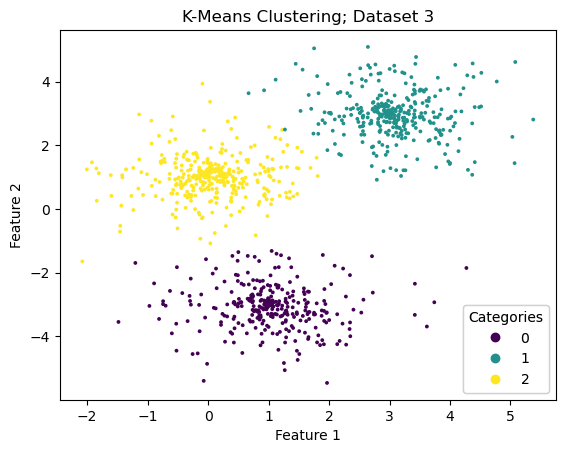

In [157]:
labels = kmeans_cluster(X3, n_clusters=3)
plot_clusters(X3, labels, title='K-Means Clustering; Dataset 3')

We see that K-means perform well on dataset 3, where the datapoints are clustered in a spherical area.

As for dataset 1 and 2, K-means struggled because their data are neither linearly separable nor spherical.

## Problem 8 (b)

In [95]:
pdist(np.array([
    [1,2],
    [1,4],
    [1,5]
]))

array([2., 3., 1.])

In [137]:
def meanshift_cluster(X, quantile=0.2):
    # Calculate pairwise distances and find the quantile for bandwidth
    distances = pdist(X)
    bandwidth = np.quantile(distances, quantile)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)

    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    return labels, cluster_centers

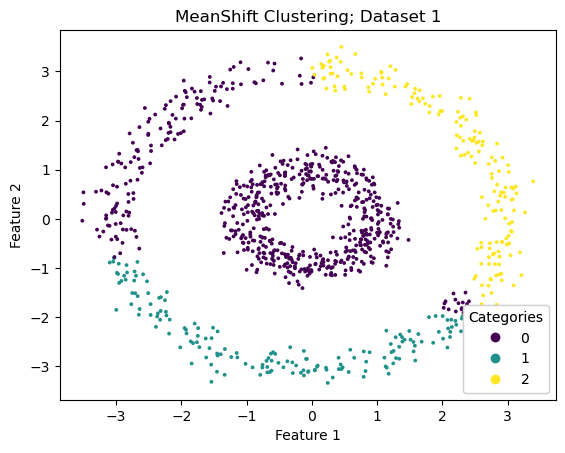

In [150]:
labels, cluster_centers = meanshift_cluster(X1)
plot_clusters(X1, labels, title='MeanShift Clustering; Dataset 1')

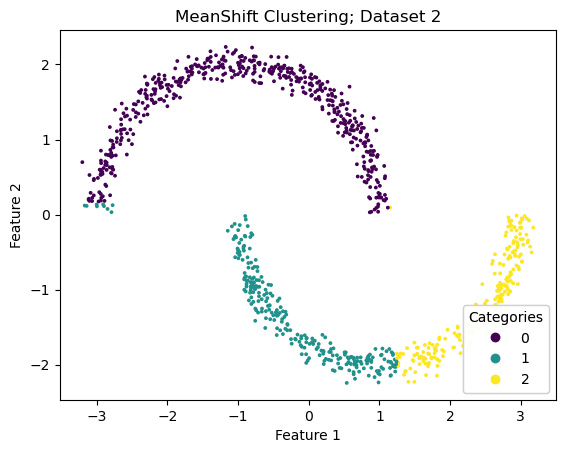

In [149]:
labels, cluster_centers = meanshift_cluster(X2)
plot_clusters(X2, labels, title='MeanShift Clustering; Dataset 2')

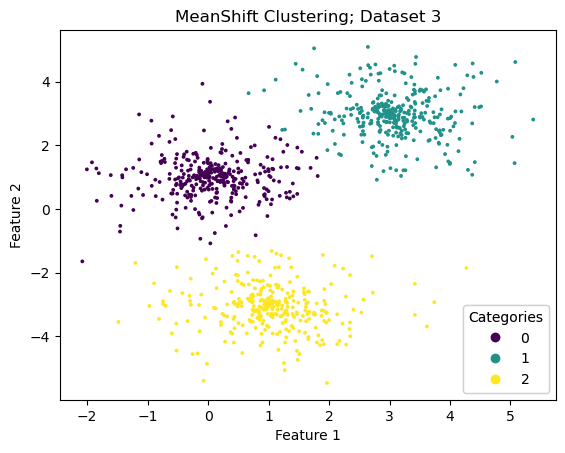

In [151]:
labels, cluster_centers = meanshift_cluster(X3)
plot_clusters(X3, labels, title='MeanShift Clustering; Dataset 3')

* For dataset 1, the $20$-th quantile in pairwise distances likely exceed the distance between the inner and outer rings. Therefore the inner and outer rings were merged.
* For dataset 2, it likely suffers similar issue as in dataset 1.
* MeanShift performs wel on dataset 3.


In essence, MeanShift is generally better suited for spherical or elliptical clusters. The radial or crescent shapes in our datasets 1 and 2 make it hard for MeanShift to identify the cluster boundaries.

## Problem 8 (c)

In [132]:
def spectral_cluster(X, n_clusters=1):
    # Calculate pairwise distances and find the quantile for bandwidth
    sc = SpectralClustering(n_clusters=n_clusters, assign_labels='kmeans', random_state=0)
    sc.fit(X)

    labels = sc.labels_

    return labels

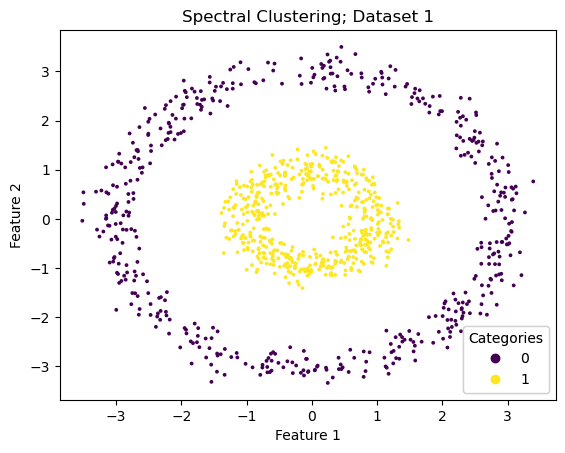

In [152]:
labels = spectral_cluster(X1, n_clusters=2)
plot_clusters(X1, labels, title='Spectral Clustering; Dataset 1')

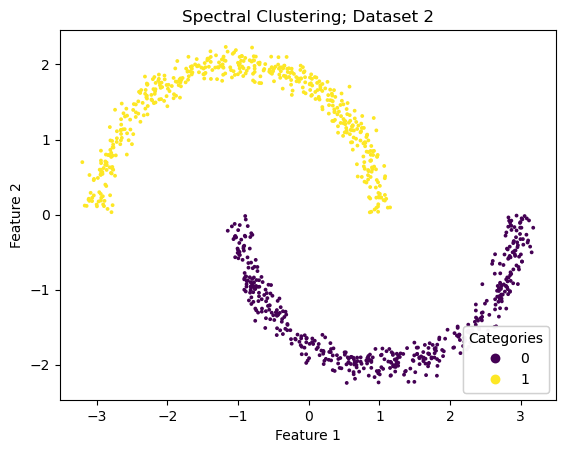

In [153]:
labels = spectral_cluster(X2, n_clusters=2)
plot_clusters(X2, labels, title='Spectral Clustering; Dataset 2')

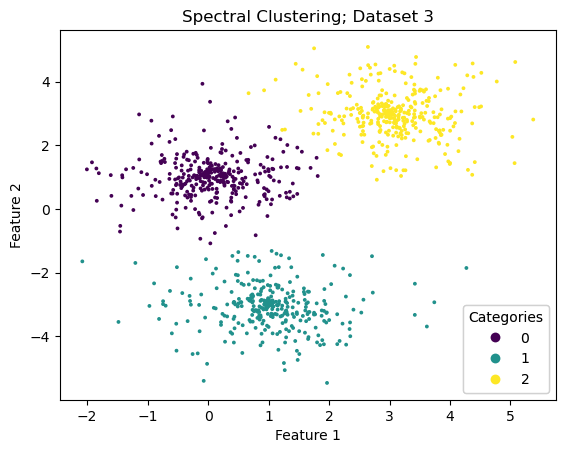

In [154]:
labels = spectral_cluster(X3, n_clusters=3)
plot_clusters(X3, labels, title='Spectral Clustering; Dataset 3')

We see that Spectral Clustering works well on all three datasets. This is because clusters are represented as connected components. It can effectively find these connected components even if they are intertwined or have irregular shapes.